# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Esercizio 07.1:
In questo esercizio vengono incluse le tail corrections all'energia potenziale e alla pressione nel codice MD/MC. 
Il codice infatti utilizzava un potenziale con un cutoff sferico ad $r_c$ e, aggiugendo queste correzioni, si compensa la
mancanza delle code del potenziale.
La tail correction del potenziale per molecola in unità ridotte è pari a $$tail_{corr}= \rho 8 \pi(\frac{1}{9 r_c^{9}}- \frac{1}{3 r_c^{3}})$$
La tail correction della pressione per molecola in unità ridotte è pari a $$tail_{corr}= 32 \rho \pi (\frac{1}{3 r_c^{9}}- \frac{1}{2 r_c^{3}})$$

### Exercise 07.2:
In questo esercizio vengono stampati a video  $M=5\times 10^5$ valori istantanei ($5\times 10^5$ blocchi da uno step)
dell'energia potenziale per particella U/N per il caso solido, liquido e gassoso. 
Per fare ciò si porta il sitema all'equilibrio e si effettua una simulazione MC NVT. Per fissare il tasso di accettazione 
dell'algoritmo di Metropolis al 50% si deve cambiare il valore di $\delta$ in  $\delta=1.1$  nel caso solido, in $\delta=0.2$   nel caso
liquido e in $\delta=0.3$ nel caso gassoso. La simulazione viene effettuata nelle seguenti condizioni termodinamiche:
- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Si trova quindi l'autocorrelazione tra i valori istantanei di U/N ottenuti in funzione del lag. Lo scopo è quello
di capire da quanti step dovrebbe essere costituito ogni blocco: un valore alto di autocorrelazione provoca una 
sottostima dell'incertezza. Il grafico sottostante rappresenta la funzione di autocorrelazione.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [3]:


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,5))            
plt.rcParams.update({'font.size': 15}) 

x1= np.arange(500000)
solidUinst= np.loadtxt("C:MDNVE_MCNVT/output_epot_inst_solid.txt", usecols=(1),  unpack='true')
liquidUinst= np.loadtxt("C:MDNVE_MCNVT/output_epot_inst_liquid.txt", usecols=(1),  unpack='true')
gasUinst= np.loadtxt("C:MDNVE_MCNVT/output_epot_inst_gas.txt", usecols=(1),  unpack='true')

#togliere # se si vuole calcolare l'autocorrelazione con tsaplots.plot_acf(data, lags)
#plot autocorrelation function
#fig = tsaplots.plot_acf(solidUinst,lags=5000)
#fig = tsaplots.plot_acf(liquidUinst,lags=5000)
#fig = tsaplots.plot_acf(gasUinst,lags=5000)
 #plt.show()
#plt.xlabel('numero di step')
#plt.ylabel('correlazione*$\sigma +<U> $ ')
#plt.title('progressive average values and uncertainties of temperature')



<Figure size 720x360 with 0 Axes>

In [4]:
steps=5000
t=np.arange(steps)
tmax=50*steps


def autocorr(epot):
    a=[np.zeros(steps) for j in range (3)]
    a[0]= [sum(epot[0:tmax-i]*epot[i:tmax]) for i in t]
    a[1]= [sum(epot[0:tmax-i]) for i in t]
    a[2]= [sum(epot[i:tmax]) for i in t]
    for i in range(3):
        a[i]/=(tmax-t)
    den=1./tmax*sum(epot[0:tmax]**2)-(1./tmax*sum(epot[0:tmax]))**2
    return (a[0]-a[1]*a[2])/den


Il grafico che rappresenta l'autocorrelazione mostra che per lag>=1000 i dati hanno un'autocorrelazione minore di 0.5. 

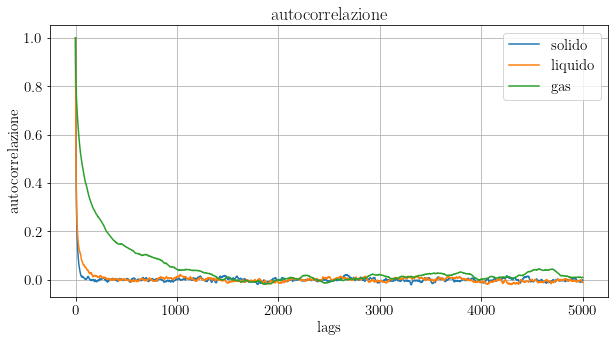

In [7]:
a_solid=autocorr(solidUinst)
a_liquid=autocorr(liquidUinst)
a_gas=autocorr(gasUinst)

plt.figure(figsize=(10,5))            

plt.plot(t,a_solid, label="solido")
plt.plot(t,a_liquid, label="liquido")
plt.plot(t,a_gas, label="gas")

plt.xlabel('lags')
plt.ylabel('autocorrelazione')
plt.title('autocorrelazione')

plt.legend()
plt.grid(True)


Infine si utlizzano i valori istantanei di U/N per ottenere una stima delle incertezze statistiche
sul valore di aspettazione di $U/N$ al variare della dimensione dei blocchi. Si parte da $L=M/N=10$ e si arriva $L=5\times 10^3$,
dove N indica il numero di blocchi e M il numero di dati. 




In [9]:
def err (ave, av2, n):
    if (n==0):
        return 0
    else:
        return np.sqrt((av2-ave**2)/n)


def blocks (u, N, L):
    ave=0
    av2=0
    error=0
    for i in range(N):
        blk_ave=0
        for j in range(L):
            blk_ave+=u[L*i+j]
        blk_ave/=L
        ave=(ave*i +blk_ave)/(i+1)
        av2=(av2*i +blk_ave**2)/(i+1)
        error=err(ave, av2, i)
    return error

error_s=[]
error_l=[]
error_g=[]
L_i=[]
M=49998
L=np.arange(10, 5000, 10)
for i in range(len(L)):
    N=int(M/L[i])
    errsolid=blocks(solidUinst, N, L[i])
    errliquid=blocks(liquidUinst, N, L[i])
    errgas=blocks(gasUinst, N, L[i])
    error_s.append(errsolid)
    error_l.append(errliquid)
    error_g.append(errgas)
    L_i.append(L[i])

    

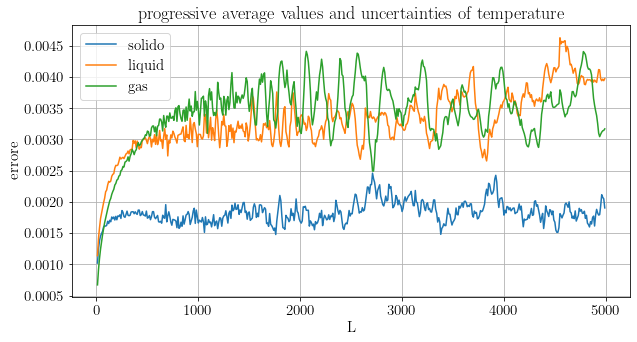

In [10]:
plt.figure(figsize=(10,5))            

plt.plot(L_i,error_s, label="solido")
plt.plot(L_i,error_l, label="liquid")
plt.plot(L_i,error_g, label="gas")
#plt.axis([-1, 50000, 0, 10000000])
plt.xlabel('L')
plt.ylabel('errore  ')
plt.title('progressive average values and uncertainties of temperature')
plt.legend()
plt.grid(True)

Il grafico che rappresenta l'errore su U/N al variare di L mostra che l'errore sul valore atteso viene sottostimato per 
L< 1000. Tale fatto conferma quanto detto sull'autocorrelazione. In questo caso quindi, per non sottostimare l'incertezza, 
si sceglie un numero di step per ogni blocco pari a 2000 (Il numero di blocchi è 50).

### Exercise 07.3
In questo esercizio nel codice viene incluso il calcolo della funzione di distribuzione radiale $g(r)$ dove r indica la distanza 
radiale tra le particelle ($r \in \left[ 0; L/2\right]$).
La funzione di distribuzione radiale è data da 
$$g(r)= \frac{1}{ \rho N \Delta V(r)} \sum \sum_{i,j=1, j \neq i}^{N} \delta (|r|- |r_i -r_j|)$$
dove N è il numero di moelcole, $\rho $ è la densità e $V(r)= \frac{4}{3} \pi ({r+ dr}^{3}-r^{3})$.
Per trovare $g(r)$ si divide  L/2 (con L si indica la radice cubica del volume) in 50 intervalli e, ogni volta che ci sono
due particelle a una distanza compresa tra 
r e dr si incrementa il contatore di 2. Alla fine della simuazione si normalizza quanto ottenuto con 
$$Norm= N \rho \frac{4 \pi}{3} ({r+dr}^3 + r^{3}) $$.


### Exercise 07.4

In questo esercizio si utilizza il codice MC per effettuare una simulazione MC NVT con il modello di 
di Lennard-Jones dell' Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) 
nelle condizioni termodinamiche illustrate sopra. 



Il grafico sottostante rappresenta i valori di dell'energia potenziale per atomo $U/N$ ottenuti.

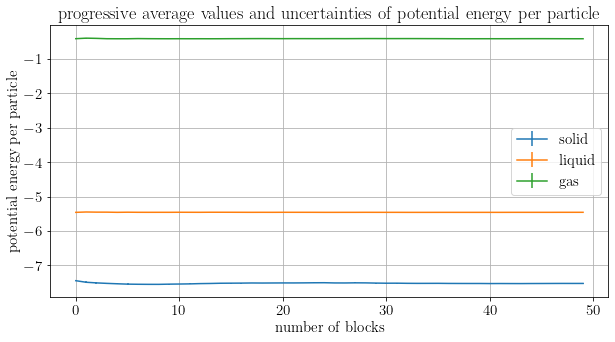

In [15]:
x=np.arange(50)
plt.figure(figsize=(10,5))   
solidu, errsu= np.loadtxt("C:MDNVE_MCNVT/output_epot_solid.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,solidu ,yerr=errsu, label="solid")
liquidu, errlu= np.loadtxt("C:MDNVE_MCNVT/output_epot_liquid.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,liquidu ,yerr=errlu, label="liquid")

gasu, errgu= np.loadtxt("C:MDNVE_MCNVT/output_epot_gas.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,gasu ,yerr=errgu, label="gas")

plt.xlabel('number of blocks')
plt.title('progressive average values and uncertainties of potential energy per particle')
plt.ylabel('potential energy per particle')
plt.legend()
plt.grid(True)


Il grafico sottostante rappresenta i valori della pressione $P$ ottenuti.

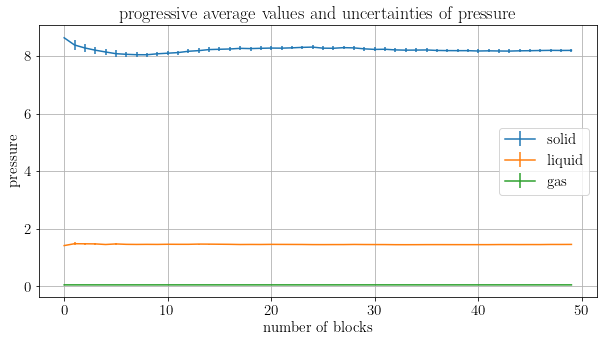

In [16]:
plt.figure(figsize=(10,5)) 
solidp, errsp= np.loadtxt("C:MDNVE_MCNVT/output_ptot_solid.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,solidp ,yerr=errsp, label="solid")
liquidp, errlp= np.loadtxt("C:MDNVE_MCNVT/output_ptot_liquid.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,liquidp ,yerr=errlp, label="liquid")
gasp, errgp= np.loadtxt("C:MDNVE_MCNVT/output_ptot_gas.txt", usecols=(2,3), unpack='true')
plt.errorbar(x,gasp ,yerr=errgp, label="gas")

           

plt.xlabel('number of blocks')
plt.title('progressive average values and uncertainties of pressure')
plt.ylabel('pressure')
plt.legend()
plt.grid(True)


I due grafici sottostanti rappresentano i valori di  $g(r)$ ottenuti. Nel primo caso è stato utlizzato il codide MC e
nel secondo il codice di Dinamica Molecolare NVT.

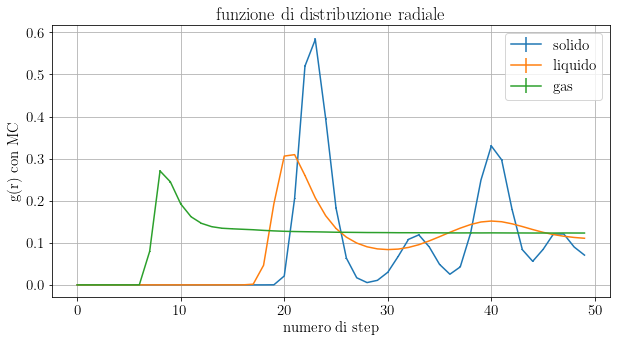

In [17]:
x=np.arange(50)
gr_fin_solid=np.zeros(50)
err_fin_solid=np.zeros(50)
gr_fin_gas=np.zeros(50)
err_fin_gas=np.zeros(50)
gr_fin_liquid=np.zeros(50)
err_fin_liquid=np.zeros(50)

solid_gr, err_gr_solid= np.loadtxt("C:MDNVE_MCNVT/output_gr_solid.txt", usecols=(3,4), unpack='true')
liquid_gr, err_gr_liquid= np.loadtxt("C:MDNVE_MCNVT/output_gr_liquid.txt", usecols=(3,4), unpack='true')
gas_gr, err_gr_gas= np.loadtxt("C:MDNVE_MCNVT/output_gr_gas.txt", usecols=(3,4), unpack='true')


a =len(gas_gr)-len(x)
for i in range (len(x)):
    gr_fin_solid[i]=solid_gr[a+i]
    err_fin_solid[i]=err_gr_solid[a+i]
    gr_fin_gas[i]=gas_gr[a+i]
    err_fin_gas[i]=err_gr_gas[a+i]
    gr_fin_liquid[i]=liquid_gr[a+i]
    err_fin_liquid[i]=err_gr_liquid[a+i]

plt.figure(figsize=(10,5))                
    
    
plt.errorbar(x, gr_fin_solid, yerr=err_fin_solid, label="solido")
plt.errorbar(x, gr_fin_liquid, yerr=err_fin_liquid, label="liquido")
plt.errorbar(x, gr_fin_gas, yerr=err_fin_gas, label="gas")
#plt.axis([-1, 50000, 0, 10000000] 
plt.xlabel('numero di step')
plt.ylabel('g(r) con MC')
plt.title('funzione di distribuzione radiale')
plt.legend()
plt.grid(True)
plt.show()



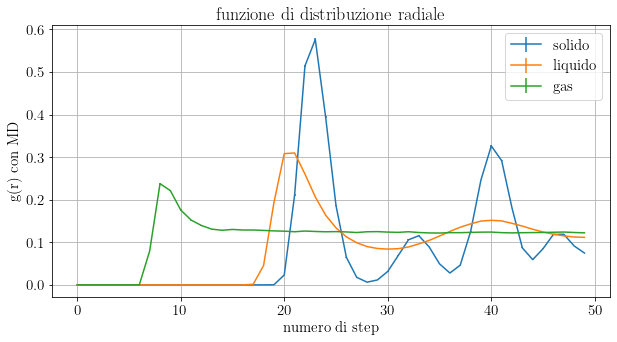

In [18]:
gr_fin_solid_MD=np.zeros(50)
err_fin_solid_MD=np.zeros(50)
gr_fin_gas_MD=np.zeros(50)
err_fin_gas_MD=np.zeros(50)
gr_fin_liquid_MD=np.zeros(50)
err_fin_liquid_MD=np.zeros(50)

solid_gr, err_gr_solid= np.loadtxt("C:MDNVE_MCNVT/output_gr_solid_MD.txt", usecols=(3,4), unpack='true')
liquid_gr, err_gr_liquid= np.loadtxt("C:MDNVE_MCNVT/output_gr_liquid_MD.txt", usecols=(3,4), unpack='true')
gas_gr, err_gr_gas= np.loadtxt("C:MDNVE_MCNVT/output_gr_gas_MD.txt", usecols=(3,4), unpack='true')


a =len(gas_gr)-len(x)
for i in range (len(x)):
    gr_fin_solid_MD[i]=solid_gr[a+i]
    err_fin_solid_MD[i]=err_gr_solid[a+i]
    gr_fin_gas_MD[i]=gas_gr[a+i]
    err_fin_gas_MD[i]=err_gr_gas[a+i]
    gr_fin_liquid_MD[i]=liquid_gr[a+i]
    err_fin_liquid_MD[i]=err_gr_liquid[a+i]

plt.figure(figsize=(10,5))                
    
    
plt.errorbar(x, gr_fin_solid_MD, yerr=err_fin_solid, label="solido")
plt.errorbar(x, gr_fin_liquid_MD, yerr=err_fin_liquid, label="liquido")
plt.errorbar(x, gr_fin_gas_MD, yerr=err_fin_gas, label="gas")
#plt.axis([-1, 50000, 0, 10000000] 
plt.xlabel('numero di step')
plt.ylabel('g(r) con MD')
plt.title('funzione di distribuzione radiale')
plt.legend()
plt.grid(True)
plt.show()


Il grafico sottostante rappresenta la differenza tra i valori di g(r) ottenuti con MD e quelli ottenuti con MC, per ognuna delle 
tre fasi. Tale grafico conferma la correttezza del codice scritto per questa esercitazione.


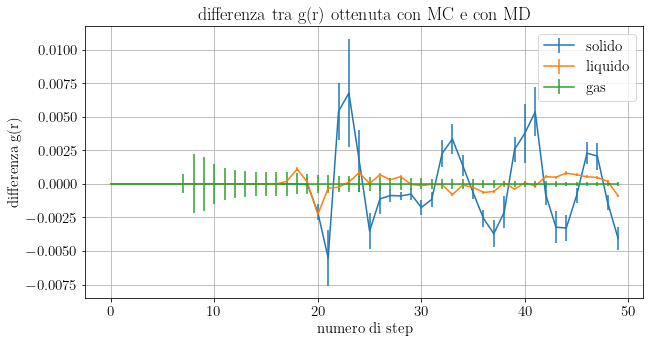

In [19]:
plt.figure(figsize=(10,5))
plt.errorbar(x, gr_fin_solid-gr_fin_solid_MD, yerr=err_fin_solid, label="solido")
plt.errorbar(x, gr_fin_liquid-gr_fin_liquid_MD, yerr=err_fin_liquid, label="liquido")
plt.errorbar(x, gr_fin_gas-gr_fin_gas, yerr=err_fin_gas, label="gas")

plt.xlabel('numero di step')
plt.ylabel('differenza g(r) ')
plt.title('differenza tra g(r) ottenuta con MC e con MD ')
plt.legend()
plt.grid(True)
plt.show()